In [1]:
import glob # library to import multiples .csv files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [4]:
#Obtendo os dados de um dia especifico
file_data = "20191020.csv"
file_ambiente = "ambientais-ufms"
file_inversor = "inversor_1_ufms"
dados_ambiente = pd.read_csv("Data/ufms/"+file_ambiente+"-"+file_data)
dados_inversor = pd.read_csv("Data/ufms/"+file_inversor+"-"+file_data)
dados_inversor.shape[0]


1379

In [10]:
#Obtendo e concatenando os dados de todos os arquivos da base de dados
path = "Data/ufms"
todos_dados_inversor = pd.concat(map(pd.read_csv, glob.glob(path + "/inversor_*.csv")))
todos_dados_inversor.shape[0]

198241

### Imprimindo os dados

In [3]:
print(dados_ambiente)


Empty DataFrame
Columns: [dia_mes_ano, hora_minuto, irr, massaPM1, massaPM2, massaPM4, massaPM10, numPM1, numPM2, numPM4, numPM10, tamanho_medio, temp, vento_dir, vento_vel, rainfall]
Index: []


In [4]:
print(dados_inversor)

      dia_mes_ano  hora_minuto  P_AC  I_AC  I_DC   V_AC   V_DC  IRR
0        20191020        10000     0  1.87  1.87    4.6   1.87    0
1        20191020        10100     0  1.87  0.00    4.6  45.20    0
2        20191020        10200     0  1.87  0.00    4.6  45.20    0
3        20191020        10300     0  1.87  0.00    4.6  45.30    0
4        20191020        10400     0  1.87  0.00    4.6  45.30    0
...           ...          ...   ...   ...   ...    ...    ...  ...
1374     20191020       235500     0  0.10  0.00  212.1  43.10    0
1375     20191020       235600     0  0.10  0.00  212.1  42.80    0
1376     20191020       235700     0  0.10  0.00  212.1  42.80    0
1377     20191020       235800     0  0.10  0.00  212.1  42.70    0
1378     20191020       235900     0  0.10  0.00  212.1  42.70    0

[1379 rows x 8 columns]


In [5]:
#Obtendo hora_mintuo da primeira e da última medida do inversor
primeira_hm_inversor = dados_inversor.hora_minuto[0]
print(primeira_hm_inversor)
ultima_hm_inversor = dados_inversor.hora_minuto[dados_inversor.shape[0]-1]
print(ultima_hm_inversor)

10000
235900


### Testes comparando as medidas da base de dados do ambiente com a do inversor

In [6]:
'''
Como podemos perceber, o tamanho dos dados de ambiente e do inversor são diferentes, nem sempre começam e terminam na mesma hora_minuto
Sendo assim temos que filtrar a medida de ambiente para conter as mesmas medidas do inversor
'''
#Obtendo hora_mintuo da primeira e da última medida do ambiente
primeira_hm_ambiente = dados_ambiente.hora_minuto[0]
print(primeira_hm_ambiente)
ultima_hm_ambiente = dados_ambiente.hora_minuto[dados_ambiente.shape[0]-1]
print(ultima_hm_ambiente)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
selecao = dados_ambiente["hora_minuto"] >= primeira_hm_inversor
dados2 = dados_ambiente[selecao].reset_index()
print(dados2.shape[0])
print(dados_inversor.shape[0])



1123
1123


In [ ]:
i_list = []
count = 0
last_hora_minuto = 52000
for i in dados_inversor.index:
    if(dados_inversor["hora_minuto"][i] - last_hora_minuto != 100):
        if(dados_inversor["hora_minuto"][i] - last_hora_minuto != 4100):
            count += 1
            i_list.append(i)
    last_hora_minuto = dados_inversor["hora_minuto"][i]
print(count)
print(i_list)

1
[0]


In [ ]:
i_list = []
count = 0
last_hora_minuto = 52000
for i in dados2.index:
    if(dados2["hora_minuto"][i] - last_hora_minuto != 100):
        if(dados2["hora_minuto"][i] - last_hora_minuto != 4100):
            count += 1
            i_list.append(i)
    last_hora_minuto = dados2["hora_minuto"][i]
print(count)
print(i_list)

1
[0]


In [ ]:
'''
Percebemos que a base de dados do ambiente não contém duas medidas no dia inteiro
Então caso queiramos comparar com essa base de dado com a do inversor iremos necessitar de realizar uma verificação
Para conseguir sincronizar as duas base de dados e os seus valores
'''
print(dados2["hora_minuto"][541:550])

541    141800
542    141900
543    142000
544    142100
545    142200
546    142300
547    142400
548    142500
549    142600
Name: hora_minuto, dtype: int64


In [ ]:
#Verificando se os IRR das duas tabelas coincidem
#52300  = 0.6
print(dados_inversor[dados_inversor["hora_minuto"] == 72300])
print(dados_ambiente[dados_ambiente["hora_minuto"] == 72300])

     dia_mes_ano  hora_minuto  P_AC   I_AC  I_DC   V_AC   V_DC  IRR
126     20191010        72300  4050  18.64  7.23  217.4  564.7  444
     dia_mes_ano  hora_minuto     irr  massaPM1  massaPM2  massaPM4  \
441     20191010        72300  448.79      7.21      0.24         0   

     massaPM10  numPM1  numPM2  numPM4  numPM10  tamanho_medio   temp  \
441          0   59.49    0.16       0        0           0.43  28.88   

     vento_dir  vento_vel  rainfall  
441         90      23.94       0.0  


### Começando a trabalhar na visualização dos dados

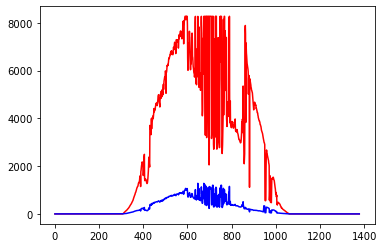

In [13]:
# Imprimindo os dados de um dia especifico
plt.plot(dados_inversor['P_AC'],color = "red") # printando a potência AC gerada
plt.plot(dados_inversor['IRR'],color = "blue") # Printando irr: solar irradiation (W/m2)

In [12]:
#importando e definindo a função necessária para calcular r²
from scipy import stats
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return r_value**2

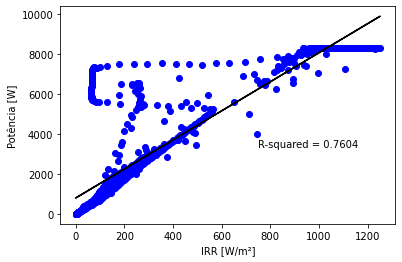

R-square =  0.7604141247507846


In [ ]:
#Plotando um gráfico scatter de um dia especifico junto com uma fit line e o R²
plt.scatter(dados_inversor['IRR'],dados_inversor['P_AC'], color = "blue")
plt.xlabel("IRR [W/m²]")
plt.ylabel("Potência [W]")

a, b = np.polyfit(dados_inversor['IRR'],dados_inversor['P_AC'], 1) #Encontrando a melhor fit line (R²) entre os dois valores
plt.plot(dados_inversor["IRR"], a*dados_inversor["IRR"]+b, color = "black",)
r2 = rsquared(dados_inversor['IRR'],dados_inversor['P_AC'])
plt.text(0.6*dados_inversor['IRR'].max(), 0.4*dados_inversor['P_AC'].max(), 'R-squared = %0.4f' % r2, color = "black")
plt.show()

print("R-square = ", r2)

### Retirando medidas com defeito

In [ ]:
#Indetificando os valores "erroneos" com o auxilio da fit line calculado na célula anterior
limite = 500
selecao_erros = (dados_inversor['P_AC'] > a*dados_inversor['IRR']+b + limite) | (dados_inversor['P_AC'] < a*dados_inversor['IRR']+b - limite)
dados_errados = dados_inversor[selecao_erros]
dados_certos = dados_inversor[~selecao_erros]



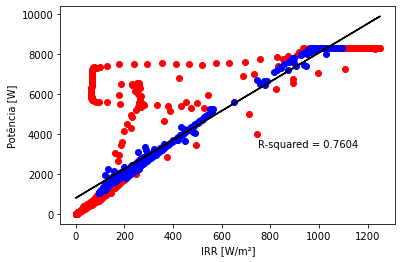

In [ ]:
#Plotando Os valores certos em azul e errados em vermelho
plt.scatter(dados_errados['IRR'],dados_errados['P_AC'], color = "red")
plt.scatter(dados_certos['IRR'],dados_certos['P_AC'], color = 'blue')
plt.xlabel("IRR [W/m²]")
plt.ylabel("Potência [W]")

a, b = np.polyfit(dados_inversor['IRR'],dados_inversor['P_AC'], 1) #Encontrando a melhor fit line entre os dois valores
plt.plot(dados_inversor["IRR"], a*dados_inversor["IRR"]+b, color = "black",)
r2 = rsquared(dados_inversor['IRR'],dados_inversor['P_AC'])
plt.text(0.6*dados_inversor['IRR'].max(), 0.4*dados_inversor['P_AC'].max(), 'R-squared = %0.4f' % r2, color = "black")
plt.show()

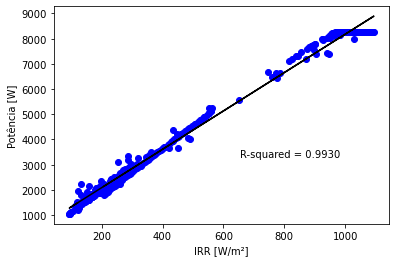

0.9930238373471735


In [ ]:
#Adquirindo R_Squared dos valores certos em azul
plt.scatter(dados_certos['IRR'],dados_certos['P_AC'], color = "blue")
plt.xlabel("IRR [W/m²]")
plt.ylabel("Potência [W]")

a, b = np.polyfit(dados_certos['IRR'],dados_certos['P_AC'], 1) #Encontrando a melhor fit line (R²) entre os dois valores
plt.plot(dados_certos["IRR"], a*dados_certos["IRR"]+b, color = "black",)
r2 = rsquared(dados_certos['IRR'],dados_certos['P_AC'])
plt.text(0.6*dados_certos['IRR'].max(), 0.4*dados_certos['P_AC'].max(), 'R-squared = %0.4f' % r2, color = "black")
plt.show()

print(r2)

### Incluindo os valores "estourados" de potência

In [ ]:
# Foi percebido que temos um valor máximo de potência de saida e foi definido interessante essa valor estar nos dados a serem enviados para a inteligencia artificial também,
# assim realizamos a sua separação
selecao_PotOverLimit = ((dados_inversor['IRR'] > 1000) & (dados_inversor['P_AC'] > 8200))
dados_overlimit = dados_inversor[selecao_PotOverLimit]

#Caso queiramos incluir os valores que a geração foi máxima podemos fazer:
frames = [dados_certos, dados_overlimit]
result = pd.concat(frames)

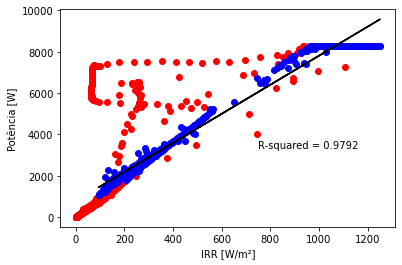

0.9792322534591584


In [ ]:
#Plotando o resultado final
plt.scatter(dados_errados['IRR'],dados_errados['P_AC'], color = "red")
plt.scatter(result['IRR'],result['P_AC'], color = "blue")
plt.xlabel("IRR [W/m²]")
plt.ylabel("Potência [W]")

a, b = np.polyfit(result['IRR'],result['P_AC'], 1) #Encontrando a melhor fit line (R²) entre os dois valores
plt.plot(result["IRR"], a*result["IRR"]+b, color = "black",)

r2 = rsquared(result['IRR'],result['P_AC'])
plt.text(0.6*result['IRR'].max(), 0.4*result['P_AC'].max(), 'R-squared = %0.4f' % r2, color = "black")
plt.show()

print(r2)
